<a href="https://colab.research.google.com/github/csantos2435/Machine_Learning/blob/main/Trabalho_2%C2%BABim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabalho 2º - 5° Semestre DSM**
* Camilli Ramos dos Santos

**Link base consumida:**

 https://archive.ics.uci.edu/dataset/502/online+retail+ii

**Informações Base de Dados**
* **Descrição:** Varejo Online II


In [49]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importando bibliotecas e a base de dados que será consumida

In [50]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

# IMPORTANDO ARQUIVO
df = pd.read_excel('/content/drive/My Drive/Trabalho-2ºBimestre/online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### **Alteração na estrutura da Base de Dados**  

Como primeiro passo foi realizado a contagem de linhas (Registros cadastrados) e colunas (Variáveis)

In [51]:
# SABER O TAMANHO DA BASE DE DADOS (LINHAS, COLUNAS)
df.shape

(525461, 8)

## **Processamento dos dados**

* ### **Eliminação de atributos irrelevantes**

  Após uma análise no conjunto de dados identifique as colunas "Invoice" sendo a coluna de identificação do registro e "Description" sendo a descrição do produto. Logo, são apenas colunas de identificação.
  
  Desta forma, para não prejudicar nos resultados foi realizada a remoção das colunas.

In [52]:
# REMOVE AS COLUNAS
df = df.drop(columns=['Invoice','Description'])

# IMPRIME O DATAFRAME
display(df.head(n=10))

,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,22064,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,21871,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,21523,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,22350,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,22349,12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


* ### **Tratamento do Tipo dos Dados**

 Devido o conjunto de dados possuir valores DateTime e Object, foi necessário converter os dados para valores numéricos e assim realizar uma melhor leitura dos dados.

In [53]:
# Converta a coluna para o tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Transforme a coluna datetime em int64 (timestamp em milissegundos)
df['InvoiceDate'] = df['InvoiceDate'].astype('int64') // 10**6

# Exiba o DataFrame convertido
print(df)

       StockCode  Quantity    InvoiceDate  Price  Customer ID         Country
0          85048        12  1259653500000   6.95      13085.0  United Kingdom
1         79323P        12  1259653500000   6.75      13085.0  United Kingdom
2         79323W        12  1259653500000   6.75      13085.0  United Kingdom
3          22041        48  1259653500000   2.10      13085.0  United Kingdom
4          21232        24  1259653500000   1.25      13085.0  United Kingdom
...          ...       ...            ...    ...          ...             ...
525456     22271         2  1291924860000   2.95      17530.0  United Kingdom
525457     22750         1  1291924860000   3.75      17530.0  United Kingdom
525458     22751         1  1291924860000   3.75      17530.0  United Kingdom
525459     20970         2  1291924860000   3.75      17530.0  United Kingdom
525460     21931         2  1291924860000   1.95      17530.0  United Kingdom

[525461 rows x 6 columns]


In [54]:
# Converte para numérico, tratando erros
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')

# Converte para Int64 (suportando NaN)
df['StockCode'] = df['StockCode'].astype('Int64')

print(df)

        StockCode  Quantity    InvoiceDate  Price  Customer ID         Country
0           85048        12  1259653500000   6.95      13085.0  United Kingdom
1            <NA>        12  1259653500000   6.75      13085.0  United Kingdom
2            <NA>        12  1259653500000   6.75      13085.0  United Kingdom
3           22041        48  1259653500000   2.10      13085.0  United Kingdom
4           21232        24  1259653500000   1.25      13085.0  United Kingdom
...           ...       ...            ...    ...          ...             ...
525456      22271         2  1291924860000   2.95      17530.0  United Kingdom
525457      22750         1  1291924860000   3.75      17530.0  United Kingdom
525458      22751         1  1291924860000   3.75      17530.0  United Kingdom
525459      20970         2  1291924860000   3.75      17530.0  United Kingdom
525460      21931         2  1291924860000   1.95      17530.0  United Kingdom

[525461 rows x 6 columns]


* ### **Tratamento de atributos com valores ausentes**

  Neste passo realizei uma leitura na base de dados para identificar os campos nullos.
  
  Foram encontrados (166.668) itens com valores nulos, sendo assim devido a grande quantidade, realizei o calculo da média de cada coluna que possui valor nulo, e subistitui os valores pela média encontrada.

In [55]:
# ÍNDICES DAS LINHAS QUE CONTÉM VALORES NAN
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()

# IMPRIME APENAS AS LINHAS COM VALORES AUSENTES
display(df.iloc[idxRowNan])

,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
1,<NA>,12,1259653500000,6.75,13085.0,United Kingdom
2,<NA>,12,1259653500000,6.75,13085.0,United Kingdom
12,<NA>,10,1259658360000,5.95,13078.0,United Kingdom
23,<NA>,12,1259658360000,4.65,13078.0,United Kingdom
28,<NA>,8,1259658360000,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...
525387,<NA>,2,1291923120000,3.75,13969.0,United Kingdom
525388,<NA>,2,1291923120000,3.75,13969.0,United Kingdom
525389,<NA>,2,1291923120000,4.95,13969.0,United Kingdom
525435,<NA>,1,1291924860000,1.95,17530.0,United Kingdom


In [56]:
import math

# Iterar pelas colunas do DataFrame
for coluna in df.columns:
    # Verificar se a coluna possui valores nulos
    if df[coluna].isnull().sum() > 0:
        # Verificar se a coluna é numérica
        if pd.api.types.is_numeric_dtype(df[coluna]):
            # Calcular a média da coluna (ignorando os NaNs)
            media = df[coluna].mean()

            # Arredondar a média
            media = math.floor(media)

            # Preencher os valores nulos com a média
            df[coluna].fillna(media, inplace=True)

            print(f'A média da coluna "{coluna}" é {media}')
        else:
            print(f'A coluna "{coluna}" é não numérica e será ignorada.')

df.head()

A média da coluna "StockCode" é 29729
A média da coluna "Customer ID" é 15360


<ipython-input-56-bfea4589020e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(media, inplace=True)


,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,85048,12,1259653500000,6.95,13085.0,United Kingdom
1,29729,12,1259653500000,6.75,13085.0,United Kingdom
2,29729,12,1259653500000,6.75,13085.0,United Kingdom
3,22041,48,1259653500000,2.10,13085.0,United Kingdom
4,21232,24,1259653500000,1.25,13085.0,United Kingdom


* ### **Tratamento de dados inconsistentes ou redundantes**

  Neste passo, realizei uma análise do conjunto de dados para identificar inconsistências e redundâncias. No entanto, por se tratar de um conjunto com colunas como "Código do Produto", "Código do Cliente", "Quantidade" e "Preço", decidi não aplicar filtros de remoção de duplicatas. Isso se deve ao fato de que vendas podem ocorrer várias vezes com o mesmo produto ou cliente. Caso esses dados fossem excluídos, uma parte significativa dos registros seria perdida, o que poderia comprometer a qualidade do aprendizado do modelo.


In [57]:
# PEGA NOME COLUNAS
columns_df = df.columns

dataset_duplicates = df[ df.duplicated(subset=columns_df,keep=False)]

# SE HOUVER VALORES REDUNDANTES OU INCONSISTENTES, IMPRIMA
if len(dataset_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(dataset_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
1,29729,12,1259653500000,6.75,13085.0,United Kingdom
2,29729,12,1259653500000,6.75,13085.0,United Kingdom
28,29729,8,1259658360000,1.25,13078.0,United Kingdom
29,29729,8,1259658360000,1.25,13078.0,United Kingdom
61,29729,56,1259659440000,3.00,18102.0,United Kingdom
...,...,...,...,...,...,...
525293,21915,5,1291918140000,1.25,17965.0,United Kingdom
525330,22739,5,1291922580000,1.65,14702.0,United Kingdom
525340,22739,5,1291922580000,1.65,14702.0,United Kingdom
525387,29729,2,1291923120000,3.75,13969.0,United Kingdom


* ### **Estatísticas da Base de dados**

  Realizei este processo de resumo estatístico com finalidade de analisar os dados do conjunto e assim ter uma melhor conclusão de qual processo realizar na base de dados ou não.

In [58]:
# APRESENTA AS PRINCIPAIS ESTATÍSTICAS DA BASE DE DADOS
dataset_detalhes = df.describe()

display(dataset_detalhes)

,StockCode,Quantity,InvoiceDate,Price,Customer ID
count,525461.0,525461.000000,5.254610e+05,525461.000000,525461.000000
mean,29729.13586,10.337667,1.277725e+12,4.688834,15360.512900
std,18253.41602,107.424110,1.002911e+10,146.126914,1498.285381
min,10002.0,-9600.000000,1.259654e+12,-53594.360000,12346.000000
25%,21670.0,1.000000,1.269174e+12,1.250000,14375.000000
50%,22353.0,3.000000,1.278410e+12,2.100000,15360.000000
75%,29729.0,10.000000,1.287147e+12,4.210000,16456.000000
max,90208.0,19152.000000,1.291925e+12,25111.090000,18287.000000


* ### **Normalização dos atributos**

  Após a análise dos dados estatísticos, identifiquei que a normalização não será necessária. Observou-se que o modelo apresenta uma melhor taxa de acerto sem a aplicação desse processo, tornando a normalização dispensável neste caso.


In [ ]:

# def normalizar(X):
#     """
#     Normaliza os atributos em X

#     Esta função retorna uma versão normalizada de X onde o valor da
#     média de cada atributo é igual a 0 e desvio padrão é igual a 1. Trata-se de
#     um importante passo de pré-processamento quando trabalha-se com
#     métodos de aprendizado de máquina.
#     """

#     m, n = X.shape  # m = quantidade de objetos e n = quantidade de atributos por objeto

#     # INICIALIZA AS VARIÁVEIS DE SAÍDA
#     X_norm = np.random.rand(m, n)  # inicializa X_norm com valores aleatórios
#     mu = 0  # inicializa a média
#     sigma = 1  # inicializa o desvio padrão

#     mu = np.mean(X, axis=0)
#     sigma = np.std(X, axis=0, ddof=1)

#     for i in range(m):
#         X_norm[i, :] = (X[i, :] - mu) / sigma

#     return X_norm, mu, sigma


# # COLOCA APENAS OS VALORES NUMÉRICOS NA VARIÁVEL X
# X = df.select_dtypes(include=[np.number]).values

# # CHAMA A FUNÇÃO PARA NORMALIZAR X
# X_norm, mu, sigma = normalizar(X)

# # ATUALIZA APENAS AS COLUNAS NUMÉRICAS DO DATAFRAME df
# df[df.select_dtypes(include=[np.number]).columns] = X_norm

# print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' % (X[0, 0], X[0, 1]))
# print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
# print('\nPrimeira amostra da base após normalização: [%2.4f %2.4f].' % (X_norm[0, 0], X_norm[0, 1]))

# ################################################################################

# # APRESENTA AS PRINCIPAIS ESTATÍSTICAS DA BASE DE DADOS
# df_detalhes = df.describe()

# display(df_detalhes.round(8))


* ### **Detecção de *Outliers***

  Neste passo verifiquei os registros com valores discrepantes, ou seja, valores fora do comum. Logo, após análises em relação aos gráficos resolvi retirar os outliers da base de dados.

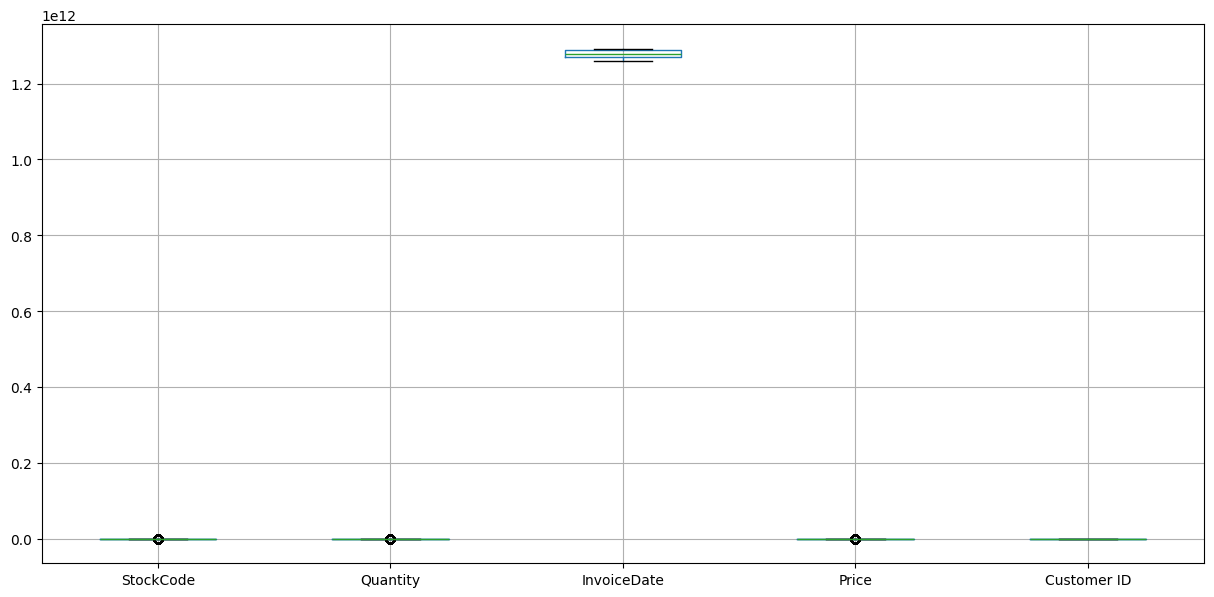

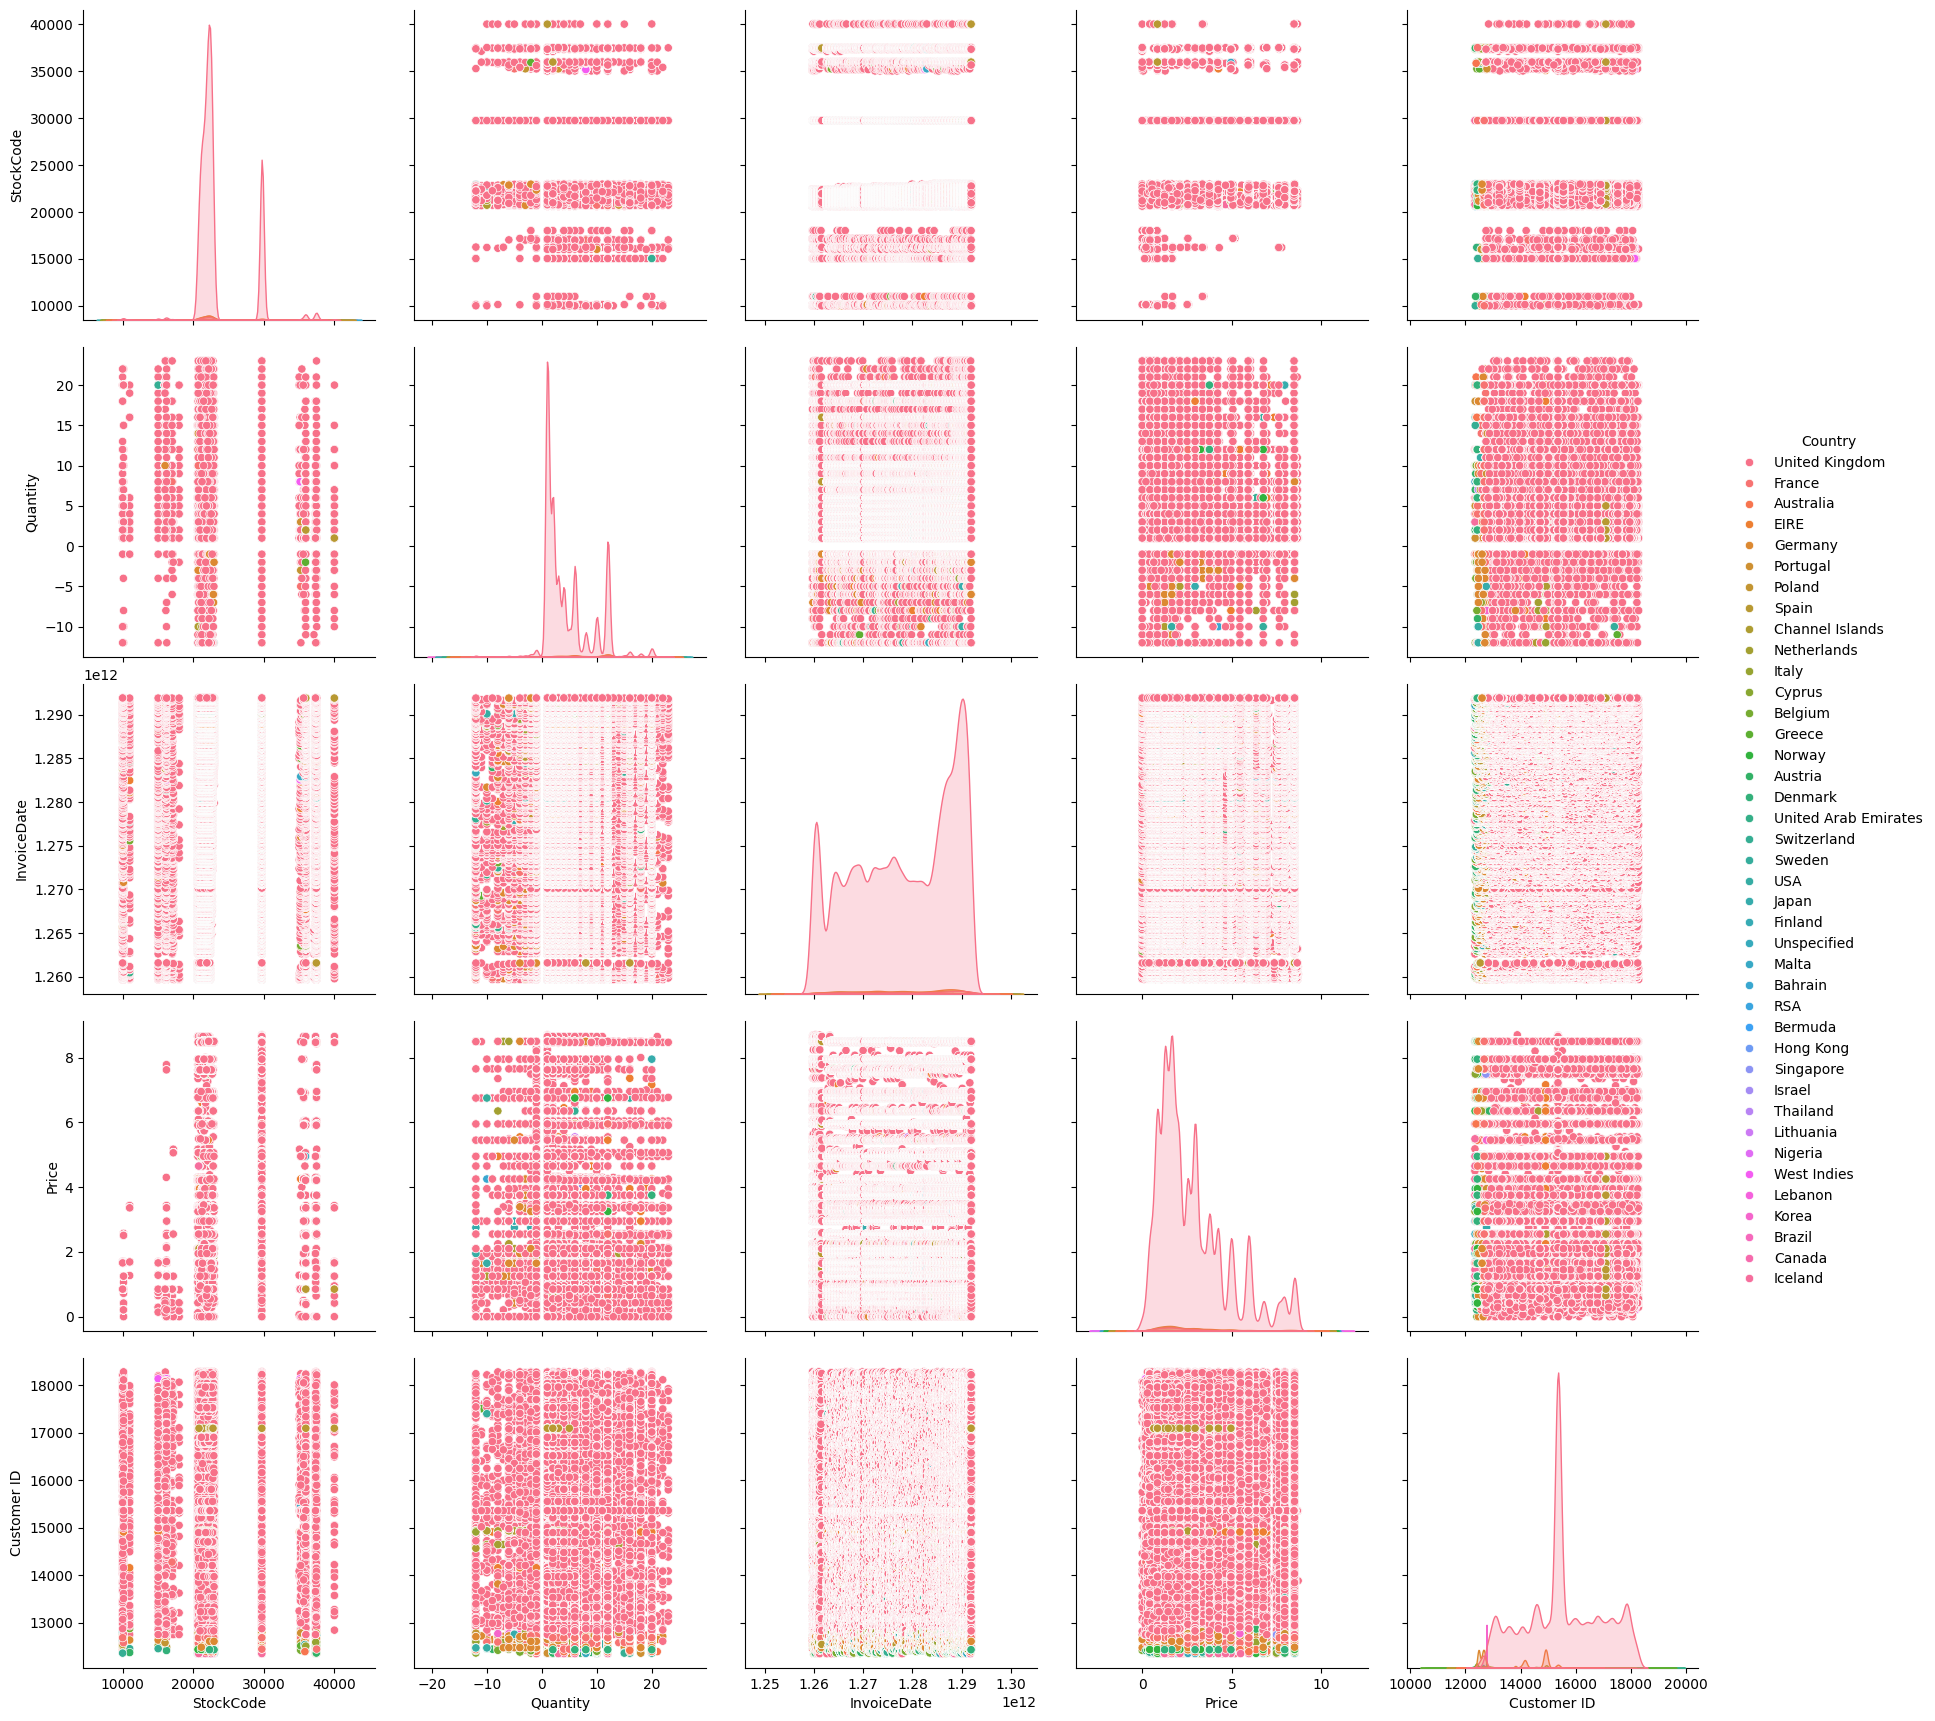

In [59]:
def removeOutliers(df):
    """
    Remove os outliers da base de dados
    """

    # Seleciona apenas as colunas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns

    for atributo in num_cols:

        # OBTÉM O TERCEIRO E O PRIMEIRO QUARTIL
        q75, q25 = np.percentile(df[atributo].values, [75, 25])

        # CALCULA O IQR
        IQR = q75 - q25

        # REMOVE OS OUTLIERS COM BASE NO VALOR DO IQR
        df = df[(df[atributo] <= (q75 + 1.5 * IQR)) & (df[atributo] >= (q25 - 1.5 * IQR))]

    return df

# REMOVE OS OUTLIERS
df = removeOutliers(df)

#################################################################################

# APRESENTA AS PRINCIPAIS ESTATÍSTICAS SOBRE A BASE DE DADOS
df.boxplot(figsize=(15, 7))
plt.show()

# MATRIZ DE GRÁFICOS SCATTER
sns.pairplot(df, hue='Country', height=3.5)

# MOSTRA O GRÁFICO USANDO A FUNÇÃO SHOW() DA MATPLOTLIB
plt.show()

* ### **Distribuição das Classes**

  Neste processo, realizamos a contagem do número de registros em cada classe, com o objetivo de analisar a frequência dos resultados obtidos por cada uma no conjunto de dados.

  Após uma análise detalhada da base, defini a coluna "Country" como a classe alvo do conjunto. O objetivo é prever, com base nos dados disponíveis, em quais países foram realizadas as vendas online, permitindo identificar os dados associados a cada compra conforme o pais.

,count
Country,
United Kingdom,359722
EIRE,6027
Germany,5859
France,4032
Netherlands,1067
Spain,832
Portugal,799
Belgium,754
Switzerland,724


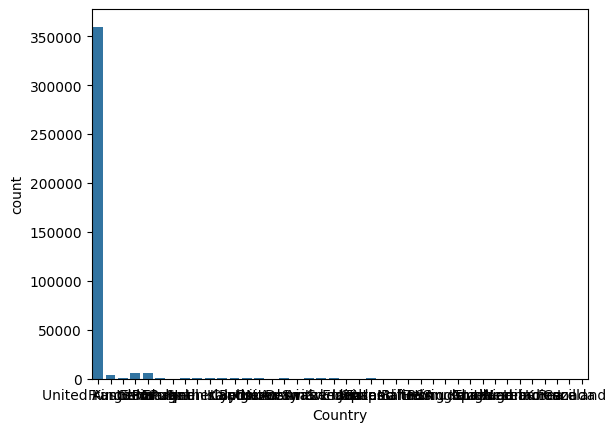

In [60]:
display(df['Country'].value_counts())

# CRIA UM GRÁFICO DE BARRAS COM A FREQUÊNCIA DE CADA CLASSE
sns.countplot(x="Country", data=df)

# MOSTRA O GRÁFICO
plt.show()

* ### **Correlação entre os atributos**
  Por fim geramos uma matriz de correlação a fim de analisar os dados após alterações do pré-processamento.
  
  O principal objetivo da matriz é verificar a interseção de duas medidas ou campos e indicar a correlação entre elas.



Matriz de correlação (np.corrcoef): 


array([[ 1.        , -0.06389074, -0.06820439,  0.06687126,  0.01382386],
       [-0.06389074,  1.        ,  0.01897856, -0.29662887, -0.12246477],
       [-0.06820439,  0.01897856,  1.        , -0.02802962,  0.02087888],
       [ 0.06687126, -0.29662887, -0.02802962,  1.        , -0.02047024],
       [ 0.01382386, -0.12246477,  0.02087888, -0.02047024,  1.        ]])



Matriz de correlação (pandas): 


,StockCode,Quantity,InvoiceDate,Price,Customer ID
StockCode,1.000000,-0.063891,-0.068204,0.066871,0.013824
Quantity,-0.063891,1.000000,0.018979,-0.296629,-0.122465
InvoiceDate,-0.068204,0.018979,1.000000,-0.028030,0.020879
Price,0.066871,-0.296629,-0.028030,1.000000,-0.020470
Customer ID,0.013824,-0.122465,0.020879,-0.020470,1.000000


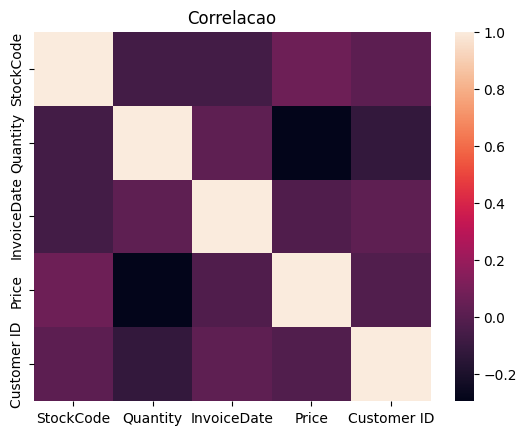

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# CRIANDO UMA MATRIZ X COM OS VALORES DO DATA FRAME
# Converter todas as colunas para float64 para evitar problemas com tipos misturados
X = df.select_dtypes(include=[np.number]).values.astype(np.float64)

# MATRIZ DE CORRELAÇÃO
correlation = np.corrcoef(X, rowvar=False)

print('\n\nMatriz de correlação (np.corrcoef): ')
display(correlation)

#################################################################################

# MATRIZ DE CORRELAÇÃO - Apenas colunas numéricas
df_correlation = df.select_dtypes(include=[np.number]).corr()

print('\n\nMatriz de correlação (pandas): ')
display(df_correlation)

#################################################################################

# CRIA UM MAPA DE CORES DOS VALORES DA CORRELAÇÃO
sns.heatmap(df_correlation,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()


* ### **Seleção de atributos**

  Não foi implementado a seleção de atributos devido possuir apenas 6 colunas.

In [ ]:
# # IMPORTANDO BIBLIOTECAS
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# # SEPARAÇÃO DAS VARIÁVEIS INDEPENDENTES (X) E A VARIAVÉL DEPENDENTE (Y)
# X = df.drop(columns=['prognostico'])
# y = df['prognostico']

# # APLICANDO A SELEÇÃO DE ATRIBUTOS COM SelectKBest
# selector = SelectKBest(score_func=f_classif, k=30)

# X_new = selector.fit_transform(X, y)

# selected_indices = selector.get_support(indices=True)
# selected_feature_names = X.columns[selected_indices].tolist()

# # IMPRIME OS NOMES DOS ATRIBUTOS SELECIONADOS
# print(f'Atributos selecionados: {selected_feature_names}')

# # Filtra as colunas de X para manter apenas as selecionadas
# X_filtered = X[selected_feature_names]

# # Atualiza o DataFrame original df para manter apenas as colunas selecionadas
# df_filtered = df[selected_feature_names + ['prognostico']

* ### **Salvando DataFrame alterado**

  Neste passo realizamos o salvamento do DataFrame original em seu formato (CSV) para ser usado no processo de extração padrão

In [76]:
df.to_csv('/content/drive/My Drive/Trabalho-2ºBimestre/varejoOnline.csv', index=False)

## **Extração Padrão**

Importando bibliotecas e o DataFrame gerado pelo Pré-Processamento.

In [77]:
# IMPORTANDO TODAS AS BIBLIOTECAS IMPORTANTES PARA CÁLCULO E CRIAÇÃO DE VISUALIZAÇÃO GRÁFICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# IMPORTANDO ARQUIVO
df = pd.read_csv('/content/drive/My Drive/Trabalho-2ºBimestre/varejoOnline.csv')
df.head()

,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,29729,12,1259653500000,6.75,13085.0,United Kingdom
1,29729,12,1259653500000,6.75,13085.0,United Kingdom
2,21523,10,1259653500000,5.95,13085.0,United Kingdom
3,22350,12,1259653560000,2.55,13085.0,United Kingdom
4,22349,12,1259653560000,3.75,13085.0,United Kingdom


### **Informações do DataFrame**

  Neste processo realizamos a listagem de informações relacionadas ao DataFreme, logo o objetivo é realizar uma análise dos dados após o Pré-processamento

In [78]:
# DIMENSÃO
print(df.shape)

################################################################################

# RESUMO ESTATÍSTICO
print(df.describe())

################################################################################

# DISTRIBUIÇÃO DE CLASSE
print(df.groupby('Country').size())

(385309, 6)
           StockCode       Quantity   InvoiceDate          Price  \
count  385309.000000  385309.000000  3.853090e+05  385309.000000   
mean    23395.536928       4.681404  1.278017e+12       2.808907   
std      3501.866812       4.537937  1.007252e+10       1.993780   
min     10002.000000     -12.000000  1.259654e+12       0.000000   
25%     21534.000000       1.000000  1.269350e+12       1.250000   
50%     22189.000000       3.000000  1.279017e+12       2.100000   
75%     22684.000000       6.000000  1.287489e+12       3.750000   
max     40016.000000      23.000000  1.291925e+12       8.700000   

         Customer ID  
count  385309.000000  
mean    15395.763421  
std      1490.417013  
min     12346.000000  
25%     14454.000000  
50%     15360.000000  
75%     16511.000000  
max     18287.000000  
Country
Australia                  374
Austria                    380
Bahrain                     84
Belgium                    754
Bermuda                     23
Brazi

### **Visualização dos dados**

Neste processo geramos os gráficos referente as informações do conjunto de dados

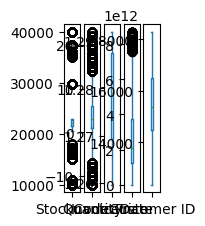

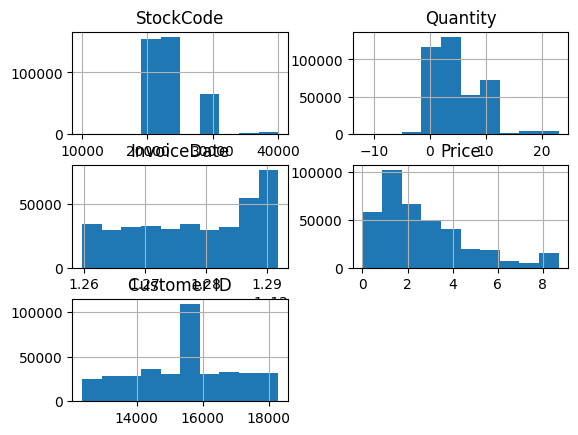

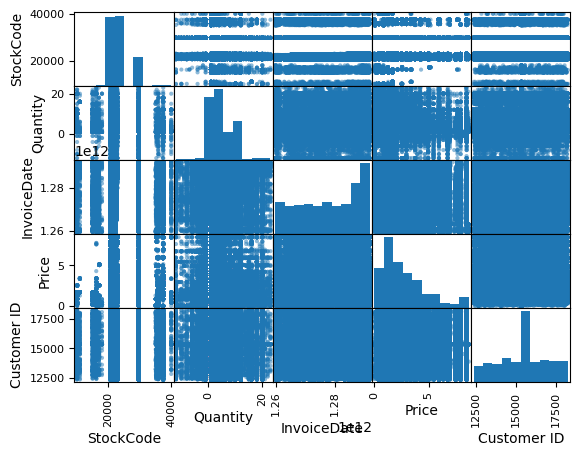

In [79]:
# GRÁFICO DE BOX AND WHISKER
df.plot(kind='box', subplots=True, layout=(2,25), sharex=False, sharey=False)
plt.show()

################################################################################

# HISTOGRAMA
df.hist()
plt.show()

################################################################################

# GRÁFICO DE DISPERSÃO
scatter_matrix(df)
plt.show()


### **Criar conjunto de validação**

  Após uma análise cuidadosa dos dados do DataFreme, avançamos para a etapa de seleção e preparação do conjunto de validação. Este conjunto, essencial para garantir a precisão e a generalização dos modelos construídos, consiste em uma parcela estratégica dos dados originalmente coletados.

In [80]:
# CONJUNTO DE VALIDAÇÃO
X = df.drop('Country', axis=1)
Y = df['Country']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)


(308247, 5)
(308247,)
(77062, 5)
(77062,)


In [81]:
# MÉTRICAS
seed = 7
scoring = 'accuracy'

### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [ ]:
# ALGORITMOS
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# AVALIAÇÃO DE CADA MODELO
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.933508 (0.001244)
LDA: 0.933839 (0.001172)
KNN: 0.994478 (0.000353)
CART: 0.998180 (0.000283)
NB: 0.933780 (0.001310)


## **Análise de Algoritmos**

  Nesta etapa crucial, procedemos com a comparação dos algoritmos em relação aos dados do DataFreme, utilizando o gráfico para visualizar suas performances. Cada algoritmo obteve distintos padrões de desempenho no processo de aprendizado. Através da comparação direta, podemos identificar quais algoritmos se destacam em termos de precisão, eficiência computacional e capacidade de generalização. Logo, esta análise serve para orientar na seleção do modelo mais adequado para as necessidades específicas do projeto de previsão de doenças.

In [ ]:
# COMPARAÇÃO DOS ALGORITMOS
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# MODELO => LR
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
# MODELO => LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
# MODELO => KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
# MODELO => CART
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
# MODELO => NB
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
# MODELO => SVM
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))

## **Importando Algoritmo junto ao DataFrame**

  Após uma análise minuciosa dos algoritmos disponíveis, identificamos que o modelo mais eficaz foi o de Árvores de Classificação e Regressão (CART), alcançando uma taxa de acerto de 99%. Diante desse resultado, decidi adotá-lo como o algoritmo de aprendizado de máquina para a base de dados. As alterações permitiram uma análise mais precisa e contribuíram significativamente para alcançar um resultado satisfatório.
  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)

# EXPORTANDO ARQUIVO DATAFRAME COM ALGORITMO
import joblib
joblib.dump(cart, '/content/drive/My Drive/Trabalho-2ºBimestre/cart.pkl')